<a href="https://colab.research.google.com/github/hgstyler/ML_tutorial/blob/main/Relu_test_08302022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic Parts: modules & data**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(777)  # for reproducibility
tf.compat.v1.disable_eager_execution() # tf.compat.v1 methods, which is not compatible with eager execution

print(f'TensorFlow: {tf.__version__}')
print(f'Numpy: {np.__version__}')

TensorFlow: 2.8.2
Numpy: 1.21.6


In [2]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.compat.v1.placeholder(tf.float32)
Y = tf.compat.v1.placeholder(tf.float32)

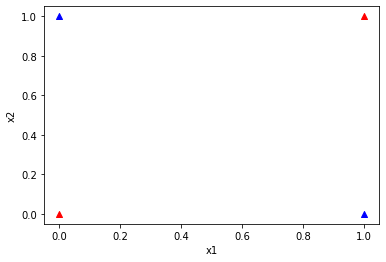

In [3]:
plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

###**Activatation Func.1. sigmoid()**###

In [4]:
W1 = tf.Variable(tf.random.uniform([2, 5], -1.0, 1.0), name = 'Weight1')

W2 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight2')
W3 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight3')
W4 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight4')
W5 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight5')
W6 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight6')
W7 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight7')
W8 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight8')
W9 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight9')
W10 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight10')

W11 = tf.Variable(tf.random.uniform([5, 1], -1.0, 1.0), name = 'Weight11')


b1 = tf.Variable(tf.zeros([5]), name='Bias1')

b2 = tf.Variable(tf.zeros([5]), name='Bias2')
b3 = tf.Variable(tf.zeros([5]), name='Bias3')
b4 = tf.Variable(tf.zeros([5]), name='Bias4')
b5 = tf.Variable(tf.zeros([5]), name='Bias5')
b6 = tf.Variable(tf.zeros([5]), name='Bias6')
b7 = tf.Variable(tf.zeros([5]), name='Bias7')
b8 = tf.Variable(tf.zeros([5]), name='Bias8')
b9 = tf.Variable(tf.zeros([5]), name='Bias9')
b10 = tf.Variable(tf.zeros([5]), name='Bias10')

b11 = tf.Variable(tf.zeros([1]), name='Bias11')

In [5]:
with tf.name_scope("Layer1_Input") as scope:
  L1 = tf.sigmoid(tf.matmul(X, W1) + b1)

with tf.name_scope("Layer2") as scope:
  L2 = tf.sigmoid(tf.matmul(L1, W2) + b2)
with tf.name_scope("Layer3") as scope:
  L3 = tf.sigmoid(tf.matmul(L2, W3) + b3)
with tf.name_scope("Layer4") as scope:
  L4 = tf.sigmoid(tf.matmul(L3, W4) + b4)
with tf.name_scope("Layer5") as scope:
  L5 = tf.sigmoid(tf.matmul(L4, W5) + b5)
with tf.name_scope("Layer6") as scope:
  L6 = tf.sigmoid(tf.matmul(L5, W6) + b6)
with tf.name_scope("Layer7") as scope:
  L7 = tf.sigmoid(tf.matmul(L6, W7) + b7)
with tf.name_scope("Layer8") as scope:
  L8 = tf.sigmoid(tf.matmul(L7, W8) + b8)
with tf.name_scope("Layer9") as scope:
  L9 = tf.sigmoid(tf.matmul(L8, W9) + b9)
with tf.name_scope("Layer10") as scope:
  L10 = tf.sigmoid(tf.matmul(L9, W10) + b10)

with tf.name_scope("Last_Output") as scope:
  hypothesis = tf.sigmoid(tf.matmul(L10, W11) + b11)

In [6]:
cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [7]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [8]:
print('------------ Training Log ------------')
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})

        if step % 1000 == 0:
            print(f'Step: {step}, {sess.run(cost, feed_dict={X: x_data, Y: y_data})} {sess.run([W1, W2, W3, W4, W5, W6, W7, W8, W9, W10])}')
    
    print('\n\n------------ Model Evaluation ------------')
    h1, c1, a1 = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print(f'Hypothesis:\n{h1}\n\nCorrect:\n{c1}\nAccuracy: {a1}')

------------ Training Log ------------
Step: 0, 0.7415908575057983 [array([[-0.39205837, -0.26624942, -0.8704281 , -0.39292142,  0.17494297],
       [ 0.18288398,  0.61109424,  0.97974825,  0.3594618 ,  0.89292145]],
      dtype=float32), array([[ 2.5922424e-01, -2.9919985e-01, -2.7132583e-01, -2.9440048e-01,
         8.0514330e-01],
       [-9.1322654e-01, -5.5022001e-01,  7.8235817e-01, -7.4473745e-01,
         6.5568489e-01],
       [-3.9689249e-01,  9.6832108e-01, -9.5649290e-01, -7.4742123e-02,
         3.8070220e-01],
       [ 3.7913892e-04, -3.8259295e-01, -4.1735530e-01, -8.2740909e-01,
        -6.3287789e-01],
       [ 3.7796527e-01, -3.3187631e-01,  6.9821835e-01,  9.7848409e-01,
        -2.4582964e-01]], dtype=float32), array([[ 0.81811655, -0.21071243,  0.03156949, -0.803846  , -0.42421794],
       [-0.38802612,  0.5669658 ,  0.44196868,  0.22582972, -0.5237181 ],
       [ 0.85260284, -0.42315984, -0.35104775,  0.61444557,  0.44877437],
       [-0.7122208 , -0.9603863 , -0.

###**Activatation Func.2. ReLU()**###

In [9]:
with tf.name_scope("Layer1_Input") as scope:
  L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

with tf.name_scope("Layer2") as scope:
  L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
with tf.name_scope("Layer3") as scope:
  L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
with tf.name_scope("Layer4") as scope:
  L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
with tf.name_scope("Layer5") as scope:
  L5 = tf.nn.relu(tf.matmul(L4, W5) + b5)
with tf.name_scope("Layer6") as scope:
  L6 = tf.nn.relu(tf.matmul(L5, W6) + b6)
with tf.name_scope("Layer7") as scope:
  L7 = tf.nn.relu(tf.matmul(L6, W7) + b7)
with tf.name_scope("Layer8") as scope:
  L8 = tf.nn.relu(tf.matmul(L7, W8) + b8)
with tf.name_scope("Layer9") as scope:
  L9 = tf.nn.relu(tf.matmul(L8, W9) + b9)
with tf.name_scope("Layer10") as scope:
  L10 = tf.nn.relu(tf.matmul(L9, W10) + b10)

with tf.name_scope("Last_Output") as scope:
  hypothesis = tf.sigmoid(tf.matmul(L10, W11) + b11)

In [10]:
cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [11]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [12]:
print('------------ Training Log ------------')
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})

        if step % 1000 == 0:
            print(f'Step: {step}, {sess.run(cost, feed_dict={X: x_data, Y: y_data})} {sess.run([W1, W2, W3, W4, W5, W6, W7, W8, W9, W10])}')
    
    print('\n\n------------ Model Evaluation ------------')
    h2, c2, a2 = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print(f'Hypothesis:\n{h2}\n\nCorrect:\n{c2}\nAccuracy: {a2}')

------------ Training Log ------------
Step: 0, 0.6928529739379883 [array([[-0.8060632 , -0.6141851 ,  0.55626893, -0.9564533 , -0.620352  ],
       [-0.61118865,  0.02157266, -0.27526283, -0.56139994,  0.8324989 ]],
      dtype=float32), array([[-0.8346634 ,  0.0094099 , -0.57863545, -0.02949882, -0.49954224],
       [ 0.81719685,  0.16949765,  0.67337394, -0.25074935, -0.02516103],
       [-0.45967126, -0.63534594, -0.8972652 , -0.597486  , -0.7602439 ],
       [-0.86131597,  0.07812357,  0.8854587 ,  0.86343193, -0.55952954],
       [-0.47839355,  0.51477706, -0.53620744, -0.5287049 , -0.12387204]],
      dtype=float32), array([[ 0.81502056,  0.3456607 ,  0.5885012 , -0.23950768,  0.69429207],
       [ 0.9196109 ,  0.01470143, -0.7533219 , -0.23975992,  0.34979546],
       [-0.61795974, -0.9564686 , -0.19629693, -0.34745574,  0.5990064 ],
       [ 0.766665  , -0.7263963 , -0.79594326,  0.62304807,  0.15255356],
       [ 0.17714477, -0.7607367 ,  0.1445396 ,  0.5065808 ,  0.33452058]

###**Activation Func.3. Leaky ReLU()**###

In [13]:
with tf.name_scope("Layer1_Input") as scope:
  L1 = tf.nn.leaky_relu(tf.matmul(X, W1) + b1)

with tf.name_scope("Layer2") as scope:
  L2 = tf.nn.leaky_relu(tf.matmul(L1, W2) + b2)
with tf.name_scope("Layer3") as scope:
  L3 = tf.nn.leaky_relu(tf.matmul(L2, W3) + b3)
with tf.name_scope("Layer4") as scope:
  L4 = tf.nn.leaky_relu(tf.matmul(L3, W4) + b4)
with tf.name_scope("Layer5") as scope:
  L5 = tf.nn.leaky_relu(tf.matmul(L4, W5) + b5)
with tf.name_scope("Layer6") as scope:
  L6 = tf.nn.leaky_relu(tf.matmul(L5, W6) + b6)
with tf.name_scope("Layer7") as scope:
  L7 = tf.nn.leaky_relu(tf.matmul(L6, W7) + b7)
with tf.name_scope("Layer8") as scope:
  L8 = tf.nn.leaky_relu(tf.matmul(L7, W8) + b8)
with tf.name_scope("Layer9") as scope:
  L9 = tf.nn.leaky_relu(tf.matmul(L8, W9) + b9)
with tf.name_scope("Layer10") as scope:
  L10 = tf.nn.leaky_relu(tf.matmul(L9, W10) + b10)

with tf.name_scope("Last_Output") as scope:
  hypothesis = tf.sigmoid(tf.matmul(L10, W11) + b11)

In [14]:
cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [15]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [16]:
print('------------ Training Log ------------')
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})

        if step % 1000 == 0:
            print(f'Step: {step}, {sess.run(cost, feed_dict={X: x_data, Y: y_data})} {sess.run([W1, W2, W3, W4, W5, W6, W7, W8, W9, W10])}')
    
    print('\n\n------------ Model Evaluation ------------')
    h3, c3, a3 = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print(f'Hypothesis:\n{h3}\n\nCorrect:\n{c3}\nAccuracy: {a3}')

------------ Training Log ------------
Step: 0, 0.6910479664802551 [array([[-0.8077362 , -0.5116632 ,  0.4845005 , -0.17039107,  0.51372254],
       [-0.29973102,  0.6666958 , -0.45626357,  0.72527534, -0.09724137]],
      dtype=float32), array([[-0.75035197, -0.8108851 , -0.65928817, -0.7499453 , -0.9985481 ],
       [-0.6894936 , -0.13226233,  0.3978039 ,  0.82553995,  0.11422594],
       [ 0.33102667, -0.53029937, -0.43304133, -0.39002243, -0.13076247],
       [-0.7488334 ,  0.3269889 ,  0.6107984 ,  0.8546047 , -0.43140805],
       [ 0.3375809 , -0.7501315 ,  0.1934519 , -0.28381124, -0.55046415]],
      dtype=float32), array([[-0.8794481 ,  0.5357215 , -0.1769438 , -0.9565913 , -0.02434645],
       [ 0.64936674,  0.8937592 ,  0.36620423,  0.15155286, -0.45700073],
       [ 0.03687682, -0.8695789 ,  0.07842887, -0.07454049,  0.27851468],
       [ 0.95238274,  0.5995256 ,  0.03833169,  0.87923235,  0.61541516],
       [ 0.66624   ,  0.9023441 ,  0.99652344,  0.55609345,  0.47802863]

###**Activation Func.4. tanh()**###

In [17]:
with tf.name_scope("Layer1_Input") as scope:
  L1 = tf.nn.tanh(tf.matmul(X, W1) + b1)

with tf.name_scope("Layer2") as scope:
  L2 = tf.nn.tanh(tf.matmul(L1, W2) + b2)
with tf.name_scope("Layer3") as scope:
  L3 = tf.nn.tanh(tf.matmul(L2, W3) + b3)
with tf.name_scope("Layer4") as scope:
  L4 = tf.nn.tanh(tf.matmul(L3, W4) + b4)
with tf.name_scope("Layer5") as scope:
  L5 = tf.nn.tanh(tf.matmul(L4, W5) + b5)
with tf.name_scope("Layer6") as scope:
  L6 = tf.nn.tanh(tf.matmul(L5, W6) + b6)
with tf.name_scope("Layer7") as scope:
  L7 = tf.nn.tanh(tf.matmul(L6, W7) + b7)
with tf.name_scope("Layer8") as scope:
  L8 = tf.nn.tanh(tf.matmul(L7, W8) + b8)
with tf.name_scope("Layer9") as scope:
  L9 = tf.nn.tanh(tf.matmul(L8, W9) + b9)
with tf.name_scope("Layer10") as scope:
  L10 = tf.nn.tanh(tf.matmul(L9, W10) + b10)

with tf.name_scope("Last_Output") as scope:
  hypothesis = tf.sigmoid(tf.matmul(L10, W11) + b11)

In [18]:
cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [19]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [20]:
print('------------ Training Log ------------')
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})

        if step % 1000 == 0:
            print(f'Step: {step}, {sess.run(cost, feed_dict={X: x_data, Y: y_data})} {sess.run([W1, W2, W3, W4, W5, W6, W7, W8, W9, W10])}')
    
    print('\n\n------------ Model Evaluation ------------')
    h4, c4, a4 = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print(f'Hypothesis:\n{h4}\n\nCorrect:\n{c4}\nAccuracy: {a4}')

------------ Training Log ------------
Step: 0, 0.6291643381118774 [array([[ 0.9360429 , -0.07791688,  0.01789919, -0.41206545,  0.9107315 ],
       [ 0.68782705,  0.45012584,  0.576658  ,  0.9160554 ,  0.8711073 ]],
      dtype=float32), array([[ 0.9762205 , -0.10760474,  0.09192777, -0.31738195, -0.1390425 ],
       [-0.8445067 , -0.45305067, -0.9758626 , -0.47640622,  0.7299558 ],
       [-0.12656851,  0.05908934,  0.30088952,  0.20690995, -0.5765987 ],
       [-0.18051137,  0.44592667, -0.2718439 , -0.17656136, -0.46777615],
       [ 0.98577785, -0.2825728 , -0.5806803 ,  0.92156917,  0.44249845]],
      dtype=float32), array([[ 0.18018806,  0.40492147,  0.17672393, -0.8585626 , -0.3254811 ],
       [-0.64657235, -0.6186205 ,  0.40376472,  0.7540594 , -0.7854988 ],
       [-0.32983792, -0.09643767,  0.24695885, -0.7232324 , -0.5839548 ],
       [-0.39285174, -0.6284389 , -0.512357  , -0.5519483 ,  0.2968445 ],
       [-0.47768232, -0.5887393 ,  0.13234077, -0.9737642 ,  0.48992425]

###**Activation Func.5.ELU()**###

In [21]:
with tf.name_scope("Layer1_Input") as scope:
  L1 = tf.nn.elu(tf.matmul(X, W1) + b1)

with tf.name_scope("Layer2") as scope:
  L2 = tf.nn.elu(tf.matmul(L1, W2) + b2)
with tf.name_scope("Layer3") as scope:
  L3 = tf.nn.elu(tf.matmul(L2, W3) + b3)
with tf.name_scope("Layer4") as scope:
  L4 = tf.nn.elu(tf.matmul(L3, W4) + b4)
with tf.name_scope("Layer5") as scope:
  L5 = tf.nn.elu(tf.matmul(L4, W5) + b5)
with tf.name_scope("Layer6") as scope:
  L6 = tf.nn.elu(tf.matmul(L5, W6) + b6)
with tf.name_scope("Layer7") as scope:
  L7 = tf.nn.elu(tf.matmul(L6, W7) + b7)
with tf.name_scope("Layer8") as scope:
  L8 = tf.nn.elu(tf.matmul(L7, W8) + b8)
with tf.name_scope("Layer9") as scope:
  L9 = tf.nn.elu(tf.matmul(L8, W9) + b9)
with tf.name_scope("Layer10") as scope:
  L10 = tf.nn.elu(tf.matmul(L9, W10) + b10)

with tf.name_scope("Last_Output") as scope:
  hypothesis = tf.sigmoid(tf.matmul(L10, W11) + b11)

In [22]:
cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [23]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [24]:
print('------------ Training Log ------------')
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})

        if step % 1000 == 0:
            print(f'Step: {step}, {sess.run(cost, feed_dict={X: x_data, Y: y_data})} {sess.run([W1, W2, W3, W4, W5, W6, W7, W8, W9, W10])}')
    
    print('\n\n------------ Model Evaluation ------------')
    h5, c5, a5 = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print(f'Hypothesis:\n{h5}\n\nCorrect:\n{c5}\nAccuracy: {a5}')

------------ Training Log ------------
Step: 0, 0.7350656986236572 [array([[ 0.16456252, -0.39734185,  0.9814339 ,  0.4748073 , -0.3947062 ],
       [ 0.77606636, -0.00857728,  0.46832344,  0.06290367, -0.23965594]],
      dtype=float32), array([[-0.6660693 ,  0.40220305, -0.40008453, -0.7717987 , -0.8921449 ],
       [-0.43100715, -0.07483993, -0.68121713,  0.36060292,  0.66778064],
       [ 0.8767931 ,  0.56764805,  0.71728945,  0.60131264,  0.2910808 ],
       [ 0.27769884,  0.45441952,  0.6038979 , -0.04157041, -0.72957546],
       [-0.5366838 ,  0.12998576,  0.5848885 , -0.23783469, -0.26601502]],
      dtype=float32), array([[ 0.8709506 ,  0.32617494,  0.735181  , -0.09391865,  0.13758866],
       [ 0.3811251 ,  0.05905948, -0.11089437, -0.5449364 ,  0.71554804],
       [ 0.92863667,  0.57512766,  0.6237603 , -0.6044165 ,  0.09842505],
       [-0.07747356, -0.602408  , -0.37965697,  0.6770764 , -0.8863538 ],
       [-0.9257208 ,  0.7049012 , -0.3131273 , -0.9400875 , -0.86692065]

###**Activation Func.6. Maxout()**###

###**Result Comparison**###

In [25]:
print('--------------- Case 1: sigmoid   ---------------')
print(f'Hypothesis:\n{h1}\n\nCorrect:\n{c1}\nAccuracy: {a1}\n')

print('--------------- Case 2: ReLU  ---------------')
print(f'Hypothesis:\n{h2}\n\nCorrect:\n{c2}\nAccuracy: {a2}\n')

print('--------------- Case 3: Leaky ReLU ---------------')
print(f'Hypothesis:\n{h3}\n\nCorrect:\n{c3}\nAccuracy: {a3}\n')

print('--------------- Case 4: tanh() ---------------')
print(f'Hypothesis:\n{h4}\n\nCorrect:\n{c4}\nAccuracy: {a4}')

print('--------------- Case 5: ELU() ---------------')
print(f'Hypothesis:\n{h5}\n\nCorrect:\n{c5}\nAccuracy: {a5}')

--------------- Case 1: sigmoid   ---------------
Hypothesis:
[[0.5       ]
 [0.50000054]
 [0.4999995 ]
 [0.50000006]]

Correct:
[[0.]
 [1.]
 [0.]
 [1.]]
Accuracy: 0.5

--------------- Case 2: ReLU  ---------------
Hypothesis:
[[1.9503710e-05]
 [9.9992955e-01]
 [5.1022655e-01]
 [5.1022655e-01]]

Correct:
[[0.]
 [1.]
 [1.]
 [1.]]
Accuracy: 0.75

--------------- Case 3: Leaky ReLU ---------------
Hypothesis:
[[3.0971343e-05]
 [9.9999952e-01]
 [9.9999779e-01]
 [3.0340834e-05]]

Correct:
[[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 1.0

--------------- Case 4: tanh() ---------------
Hypothesis:
[[2.0629168e-04]
 [9.9978340e-01]
 [9.9981487e-01]
 [2.1231174e-04]]

Correct:
[[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 1.0
--------------- Case 5: ELU() ---------------
Hypothesis:
[[7.3947122e-05]
 [9.9999964e-01]
 [9.9999976e-01]
 [8.8489056e-04]]

Correct:
[[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 1.0
